<a href="https://colab.research.google.com/github/reisdout/FederatedColab/blob/main/federated_network_1ACK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive  
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import time
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import RegressorMixin
from tensorflow.python import training
import gc

https://ai-pool.com/d/how-to-get-the-weights-of-keras-model-

Keras has implemented some functions for getting or setting weights for every layer. 

    layer.get_weights(): returns the weights of the layer as a list of Numpy arrays.
    layer.set_weights(weights): sets the weights of the layer from a list of Numpy arrays.

Using these functions you can write a piece of code to get all layers' weights

for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays

Or you can get the weights right from the model

from keras.models import Sequential

model = Sequential()
# ...
weights = model.get_weights() # returs a numpy list of weights

Keras model also has get_weights() and set_weights(weights) functions like every layer has.

If you need more take a look at this keras doc.






https://stackoverflow.com/questions/47183159/how-to-set-weights-in-keras-with-a-numpy-array

The set_weights() method of keras accepts a list of numpy arrays, what you have passed to the method seems like a single array. The shape of this should be the same as the shape of the output of get_weights() on the same layer. Here's the code:
```
l=[]
x=np.array() #weights
y=np.array() #array of biases
l.append(x)
l.append(y)
```

loaded_model.layers[0].set_weights(l) #loaded_model.layer[0] being the layer


In [5]:
'''
  
class Server_FederatedOMS:
  
  In the central server, we decide to use only the highest
  accuracy holder model as the central server updated model, send it to the local
  clients after the computation.



  def ReceiveModelsFromClients(self, parIdCliente):
    print("Recebido Modelo do Cliente 1")
  def Consolidar(self):
    print("Consolidado todos os modelos")
  def FeedBackConsolidatedModel(self):
    print ("Modelos enviados")

  clients = ['Cliente1', 'Cliente2']


class Server_FederatedBMA():

owever, in the BMA technique, the central server receives
four models with model accuracy performances from the local servers or clients.
In the central server, we sort the model using their performances. Then we
decide to use the two best models or half of the models based on performances.
Then BMA technique loops through each model’s hidden layers and neurons to do
the sum of the weights and average them accordingly.

  def ReceiveModelsFromClients(self)
  def Consolidar(self)
  def FeedBackConsolidatedModel(self)

    clients[] = ['Cliente1', 'Cliente2']



    def __init__(self, parCentralServer, parId):
      self.id=parId
      self.centralServer = parCentralServer
      #self.centralServer.RegisterClient(self,self)


'''
class Client():



    #resultadoTreinamento = np.eye(10)

    def __init__(self,parId,parTraininPath, parTestPath, parPrevisionWindow):
      self.id=parId
      self.trainingPath=parTraininPath
      self.testPath = parTestPath
      self.T = parPrevisionWindow
      #centralServer = Server_FederatedAMA()
      #confusionMatrizModelClient = np.full((2,2), 1)
      #confusionMatrizModelServer = np.full((2,2), 2)
      self.currentConfusionMatriz =np.full((2,2), 0) # Apesar de ser obtidas a partir de listas, a matriz de comfusão é numpy
      self.weightsClientModel = []
      self.weightsServerModel = []
      #self.base = pd.DataFrame()
      #self.base_treinamento =  np.array([])
      self.real_congestion_test = np.array([])
      #self.test_vectors = []
      #self.previsores = []
      #self.real_congestion = []
      #self.regressor = Sequential()
      self.input_shape =0;
      self.len_base_teste = 0;
      #self.centralServer.RegisterClient(self,self)

    def RefreshFromServerModel(self):
      if(self.ServerModelIsBetter()):
          print("Pesos atualizados de acordo com o modelo do servidor")
      else:
          print("Pesos Mantidos de acordo com o modelo do cliente")

    def LoadTainingDataSet(self):
      base = pd.read_csv(self.trainingPath)
      base = base.dropna()
      base_treinamento = base.iloc[:, [2,4,6,8]].values
      #base_treinamento = base.iloc[:, [2,4,6]].values
      previsores=[]
      real_congestion = []
      for i in range(self.T, base_treinamento.shape[0]): #base_treinamento.shape[0] número de linhas dos dados de treinamento
        previsores.append(base_treinamento[i-self.T:i, 0:4])#o que é considerado é o limite superior do rante -1
        #previsores.append(base_treinamento[i-self.T:i, 0:3])#o que é considerado é o limite superior do rante -1
        real_congestion.append(base_treinamento[i, 3])#O resultado é do último cara
      previsores, real_congestion = np.array(previsores), np.array(real_congestion)

      #print("previsores: ")
      #print(previsores)
      #input("exibidos os previsores")
      print("Real Congestion: ")
      #print(real_congestion)
      #input("exibidos os Congestionamentos Reais")
      self.input_shape = previsores.shape[1]
      return previsores, real_congestion


    def RefreshModel(self, parInitial=False): #Constroi na primeira vez e atualiza, a partir da avaliação do servidor cetral
      #pensar melhor no critério
      previsores,real_congestion = self.LoadTainingDataSet()

      regressor = Sequential()
            
      if(parInitial):#tem que construir a rede do zero e treinar os pesos
 
        regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (self.input_shape, 4)))# 4, pois são 4 previsores
        #regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (self.input_shape, 3)))# 3, retirando o valor do preenchimento do buffer.
        regressor.add(Dropout(0.3)) #zerar 30% das entradas para evitar o overfiting
        regressor.add(LSTM(units = 50, return_sequences = True))
        regressor.add(Dropout(0.3))
        regressor.add(LSTM(units = 50, return_sequences = True))
        regressor.add(Dropout(0.3))
        regressor.add(LSTM(units = 50))
        regressor.add(Dropout(0.3))

        '''
        Segundo https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21
        as saídas de cada unidade da LSTM e, portanto, a saída global é a dimenção do número de previsores, que, no nosso
        caso, é 4. Daí esses 4 estão sendo levados em um softmax de tres neurônios, pois há tres categorias no final"
        ''' 
        regressor.add(Dense(units = 1, activation = 'sigmoid', name="client_"+str(self.id)))
        regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['mean_absolute_error'])
        #es = EarlyStopping(monitor = 'loss', min_delta = 1e-10, patience = 10, verbose = 1)
        #rlr = ReduceLROnPlateau(monitor = 'loss', factor = 0.2, patience = 5, verbose = 1)
        #mcp = ModelCheckpoint(filepath = 'pesos.h5', monitor = 'loss',  save_best_only = True, verbose = 1)
      if(len (self.weightsClientModel)):
        regressor.set_weights(self.weightsClientModel)
        #regressor.fit(previsores, real_congestion, epochs = 50, batch_size = 32, callbacks = [es, rlr, mcp])
      regressor.fit(previsores, real_congestion, epochs = 20, batch_size = 32)
      self.weightsClientModel = regressor.get_weights()
 
    def GetMapedMatrix(self,parPrevisoes):
      classe_teste2 = []
      previsoes2 =  []

      for i in range(0, self.len_base_teste):
        if(self.real_congestion_test[i,0] < 0.3):
          classe_teste2.append(0)
        elif (self.real_congestion_test[i,0] >= 0.3 and self.real_congestion_test[i,0] < 0.75):
          classe_teste2.append(1)
        else:
          classe_teste2.append(2)

      for i in range(0, parPrevisoes.shape[0]):
        if(parPrevisoes[i,0] < 0.3):
          previsoes2.append(0)
        elif (parPrevisoes[i,0] >= 0.3 and parPrevisoes[i,0] < 0.75):
          previsoes2.append(1)
        else:
          previsoes2.append(2)

      return classe_teste2, previsoes2


    def EvalueteServerModel(self, parServerModel):

      test_vectors = self.LoadTestData()
      previsoes = parServerModel.predict(test_vectors)
      updated = False
      '''
      Observe que os previsores teste tem 90 quádruplas que conduzem ao resultado
      do último estado, da quádrupla 90. Prontamente preparado para pevisões....
      '''
      classe_teste2,previsoes2 = self.GetMapedMatrix(previsoes)
      matriz = confusion_matrix(classe_teste2,previsoes2)
      currentSum = 0
      newSum = 0
      if(self.currentConfusionMatriz.ndim > 1): # as vezes a rede pode errar ao ponto de dar só uma categoria, daí cai no else...
        for i in range (0, len(self.currentConfusionMatriz)):
            currentSum = currentSum + self.currentConfusionMatriz[i][i]
      else:
        currentSum = self.currentConfusionMatriz[i]
      if(matriz.ndim > 1):
        for i in range (0, len(matriz)):
          newSum = newSum + matriz[i][i]
      else:
        newSum = matriz[i]
      if(newSum > currentSum):
        self.currentConfusionMatriz = np.array(matriz)
        #self.regressor.set_weights(self.weightsServerModel)
        self.weightsClientModel.clear()
        for e in self.weightsServerModel:
          self.weightsClientModel.append(e)
        updated = True
      print ("Modelo do Servidor avaliado")
      return updated 

     


    def LoadTestData(self):
      base = pd.read_csv(self.trainingPath)
      base = base.dropna()
      base_teste = pd.read_csv(self.testPath)
      base_teste = base_teste.dropna()
      #self.real_congestion_test = base_teste.iloc[:, 5:6].values
      self.real_congestion_test = base_teste.iloc[:, 8:9].values
      #print("observe os valores de teste")
      #print(self.real_congestion_test.shape)
      #print(self.real_congestion_test)
      input("Valores de teste Exibidos")

      frames = [base, base_teste]
      base_completa = pd.concat(frames)
      base_completa = base_completa.drop('#Ack', axis =1) #
      base_completa = base_completa.drop('ack_ewma(ms)', axis =1)
      base_completa = base_completa.drop('send_ewma(ms)', axis =1)
      base_completa = base_completa.drop('rtt_tatio', axis =1)
      base_completa = base_completa.drop('cwnd (Bytes/1000)', axis =1)
      base_completa = base_completa.drop('Last Router Ocupation Packet Sent(Packets)', axis =1)
      base_completa = base_completa.drop('Network Situation', axis =1)
      base_completa = base_completa.drop('AckArrival(ms)', axis =1)
      base_completa = base_completa.drop('TSInsideAck(ms)', axis =1)
      base_completa = base_completa.drop('RTTAck(ms)', axis =1)
      entradas = base_completa[len(base_completa) - len(base_teste) - self.T:].values
      #base_teste_features = base_teste.iloc[:, [1,2,3,6]].values
      print("#############len(base_teste): ",len(base_teste))
      self.len_base_teste = len(base_teste)
      X_teste = []

      for i in range(self.T, len(base_teste)+self.T): # para as duzentas previsoes, o mesmo tramanho do Teste.csv, ou seja 290-90
        X_teste.append(entradas[i-self.T:i,0:4])
        #print("Previsor")
        #print(X_teste[i-self.T])
        #input("Exibido mais um previsor")


      test_vectors = np.array(X_teste) # equivalente ao X_teste
      return test_vectors
    '''   
    def RefreshConfusionClientMatrix(self):
      #confrontar resultados
      self.confusionMatrizModelClient = np.full((2,2),random.randint(0,9))

    def RefreshConfusionServerMatrix(self):
      #confrontar resultados
      self.confusionMatrizModelServer = np.full((2,2),random.randint(0,9))
    '''       
    def ReceiveModelFromServer(self, parCandidateMatrix):
      print("Cliente ", self.id, " Recebido Modelo do Servidor")
      self.weightsServerModel.clear()
      for e in parCandidateMatrix :
        self.weightsServerModel.append(e)
      
    def SendModelToServer(self):
      self.centralServ.ReceiveModelsFromClients(self.id)
      print("Client", self.id, "Sending Model To Server")
    '''
    def TreinarModelo(self):
      print("Cliente ", self.id, "treinando Modelo")
      time.sleep(random.randint(0,9))
      self.RefreshConfusionClientMatrix()

    '''
    def GetPrevision(self): #evalueta indica que é uma avaliação do modelo recebido como parametro, no caso do servidor
      test_vectors = self.LoadTestData()

      #print("Observe os testadores")
      #print("shape: ",test_vectors.shape)
      #print(test_vectors)
      #input("testadores exibidos")

      regressor = Sequential()
      regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (self.input_shape, 4)))# 4, pois são 4 previsores
      regressor.add(Dropout(0.3)) #zerar 30% das entradas para evitar o overfiting
      regressor.add(LSTM(units = 50, return_sequences = True))
      regressor.add(Dropout(0.3))
      regressor.add(LSTM(units = 50, return_sequences = True))
      regressor.add(Dropout(0.3))
      regressor.add(LSTM(units = 50))
      regressor.add(Dropout(0.3))
      regressor.add(Dense(units = 1, activation = 'sigmoid',name="client_eval_"+str(self.id)))
      regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['mean_absolute_error'])

      regressor.set_weights(self.weightsClientModel)

      previsoes = regressor.predict(test_vectors)
      previsoes.mean()
      self.real_congestion_test.mean()    
      plt.plot(self.real_congestion_test, color = 'red', label = 'Cwnd real')
      plt.plot(previsoes, color = 'blue', label = 'Cwnd Previsto')
      plt.title('Previsão do Congestionamento')
      plt.xlabel('ACK')
      plt.ylabel('Ocupacao Fila')
      plt.legend()
      plt.show()
      input("Observe a tendência")
      #print("Observe as previsoes")
      #print("shape: ",previsoes.shape)
      #print(previsoes)
      #input("previsoes exibidas")
     
      #previsoes = parNeuralModel.predict(self.test_vectors)
     
      '''
      Observe que os previsores teste tem 90 quádruplas que conduzem ao resultado
      do último estado, da quádrupla 90. Prontamente preparado para pevisões....
      '''
      #classe_teste2 = np.array([])
      #previsoes2 =  np.array([])
      classe_teste2,previsoes2 = self.GetMapedMatrix(previsoes)
      '''
      for i in range(0, len(self.base_teste)):
        if(self.real_congestion_test[i] < 0.3):
          classe_teste2 = np.append(classe_teste2,0)
        elif (self.real_congestion_test[i,0] >= 0.3 and self.real_congestion_test[i] < 0.75):
          classe_teste2= np.append(classe_teste2,1)
        else:
          classe_teste2 = np.append(classe_teste2,2)

      for i in range(0, len(previsoes)):
        if(previsoes[i] < 0.3):
          previsoes2= np.append(previsoes2,0)
        elif (previsoes[i] >= 0.3 and previsoes[i] < 0.75):
          previsoes2= np.append(previsoes2,1)
        else:
          previsoes2 = np.append(previsoes2,2)
      '''
      self.currentConfusionMatriz = confusion_matrix(classe_teste2,previsoes2)
      return self.currentConfusionMatriz # Com a configuração corrente, essa é a matriz....
        

    def ServerModelIsBetter(self):
        regressorServer = Sequential()
        regressorServer.add(LSTM(units = 100, return_sequences = True, input_shape = (self.input_shape, 4)))# 4, pois são 4 previsores
        regressorServer.add(Dropout(0.3)) #zerar 30% das entradas para evitar o overfiting
        regressorServer.add(LSTM(units = 50, return_sequences = True))
        regressorServer.add(Dropout(0.3))
        regressorServer.add(LSTM(units = 50, return_sequences = True))
        regressorServer.add(Dropout(0.3))
        regressorServer.add(LSTM(units = 50))
        regressorServer.add(Dropout(0.3))

        '''
        Segundo https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21
        as saídas de cada unidade da LSTM e, portanto, a saída global é a dimenção do número de previsores, que, no nosso
        caso, é 4. Daí esses 4 estão sendo levados em um softmax de tres neurônios, pois há tres categorias no final"
        ''' 
        regressorServer.add(Dense(units = 1, activation = 'sigmoid',name="client_eval_"+str(self.id)))
        regressorServer.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['mean_absolute_error'])
        regressorServer.set_weights(self.weightsServerModel)
        return self.EvalueteServerModel(regressorServer)




class Server_FederatedAMA():
  '''
  During the aggregation,
  we first sum and average the neuron weights of each model. Then we store the
  average value in the designated global model position. In the neural network
  model, the same process is calculated for every neuron. After completing Al-
  gorithm 2, the central server aggregated model is sent to all the clients for the
  next learning phase
  '''
  def __init__(self):
    self.clients = []
    self.ReceivedModel = [False,False,False]
    self.consolidateWeightMatrix = []

  def PrintRegistredClients(self):
    print("Registring Clients")
    for x in self.clients:
      print("Client ", x.id)
  
  def RegisterClient(self, parCliente):
    self.clients.append(parCliente)
    #print("Cliente ", parCliente.id, " Regitrado com sucesso")

  '''
  def ReceiveModelsFromClient(self, parId):
   print("Recebido Modelos dos Cliente ", parId)    
   self.ConsolideModels()

  '''  
    

  def ConsolidateModels(self):

    '''
      #########################################################################################################################################
      listaBase = [["amarelo","verde","preto"], ["azul","abóbora","marrom"], ["uva","laranja","branco"]]
      arrays_in_Layer=[]
      lstTemp = []
      lst_arrays_in_Layer = []
      for layer in listaBase:
          for arr in layer:
              lstTemp.append(arr)
          arrays_in_Layer = [i for i in lstTemp]
          lst_arrays_in_Layer.append(arrays_in_Layer)
          lstTemp.clear()
      print (lst_arrays_in_Layer)
      
      
      #uma inspiraçao
      l=[]
      x=np.array() #weights
      y=np.array() #array of biases
      l.append(x)
      l.append(y)
      loaded_model.layers[0].set_weights(l) #loaded_model.layer[0] being the layer
  
    '''
    #client_layers = []

    numberClients = len(self.clients)
    #lstTemp = []
    #arrays_in_Layer=[]
    #lst_arrays_in_Layer = []
    #lst_consolidated_arrays_in_layer = [] #as camadas, composta por arraysconsolidados
    consolidated_arrays_in_layer = [] #arrays da camada
    #consolidated_array = None
    consolidated_model = []
    clients_weighted_models = []
    '''
    #Cada weightsClientModel é uma lista de numpyarrays crua "flatem", isto é
    se um modelo tem, por exemplo, 3 camadas e cada uma com dois arrays, o 
    weightsClientModel será uma lista de 6 numpy´s, com os dois primeiros vetores da 
    primeira camada no início, seguidos dos dois da segunta e, depois, os dois da terceira.
    Nada de listas. É uma Listona de numpys
    '''
    for client in self.clients:
        #print(client.weightsClientModel)
        #input("pesos acima")
        clients_weighted_models.append(client.weightsClientModel)
    
    
    #Criando a estrutura do Modelo
    #for model in client_weighted_model:
    '''
    count_arrays=0
    count_layers=0
    for arr in clients_weighted_models[0]:
       if(arr.shape[0]):
          count_arrays+=1
          consolidated_arrays_in_layer.append(np.full((2,2), 0))
    input(f"Quantidade de Arrays {count_arrays} do modelo")
        
    #for i in range(0,len (clients_weighted_models)):
    print("Shapes do modelo Consolidado")
    for j in range (0, len(consolidated_model)):
        for k in range (0, len (consolidated_model[j])):
            #print (f"({i},j{j},k{k}")
            print("consolidated shape--> (", consolidated_model[j][k].shape,")")
            
    input("final das shape")
    
    ############################################
    
    ###############Verificando as Shapes
    
    for i in range(0,len (clients_weighted_models)-1):
        print("Verificando as shapes")
        #input("mais uma shape")
        for j in range (0, len(clients_weighted_models[i])):
            for k in range (0, len (clients_weighted_models[i][j])):
                
                if(clients_weighted_models[i][j][k].shape != clients_weighted_models[i+1][j][k].shape):
                        print("shapes incompativeis")
                        #exit(1)
                       
    
    print("camadas cliente 0:", len(clients_weighted_models[0][0]))
    
    print("camadas modelo consolidado: ", len(consolidated_model[0]))
    '''
    
    for i in range(0,len (clients_weighted_models)):
       for j in range (0, len(clients_weighted_models[i])):
            if(i==0):
                consolidated_model.append(clients_weighted_models[i][j])#alocando a lista com os pesos do primeiro modelo.
            else:
                consolidated_model[j] = consolidated_model[j] + clients_weighted_models[i][j]
            if (i == numberClients - 1):
                consolidated_model[j] = consolidated_model[j]/numberClients
                
    
    '''
    
    for model in client_weighted_model:
        count_client = count_client + 1    
        for layer in model:
            for arr in layer:
                if(count_client==0):
                    consolidated_array = arr
                else:
                    consolidated_array = consolidated_array + arr
                if (count_client == numberClients - 1):
                    consolidated_array = consolidated_array/numberClients
                consolidated_arrays_in_layer.append(consolidated_array)
            lst_consolidated_arrays_in_layer.append(consolidated_arrays_in_layer)
    

    #obtendo os numpy de cada layer
    count_client=-1
    for model in client_weighted_model:
        count_client = count_client + 1    
        for layer in model:
            for arr in layer:
                if(count_client==0):
                    consolidated_array = arr
                else:
                    consolidated_array = consolidated_array + arr
                if (count_client == numberClients - 1):
                    consolidated_array = consolidated_array/numberClients
                consolidated_arrays_in_layer.append(consolidated_array)
            lst_consolidated_arrays_in_layer.append(consolidated_arrays_in_layer)
            
    self.consolidateWeightedMatrix = lst_consolidated_arrays_in_layer
                
              
      arrays_in_Layer = [i for i in lstTemp]
      lst_arrays_in_Layer.append(arrays_in_Layer)
      lstTemp.clear()
      
    client_layers.append(lst_arrays_in_Layer)
    
    #consolidando os pesos
    cout_client=-1
    for client_layer in client_layers:
      cont_client = count_client+1  
      for array_list in client_layer:
        for array in array_list:
            if(count_client==0):
                consolidated_array = array
            else:
                consolidated_array = consolidated_array + array
                
        consolidated_arrays_in_layer.append(consolidated_array)
      
    
    for i in range (1, numberClients):
      self.consolidateWeightedMatrix = self.consolidateWeightedMatrix + self.clients[i].weightsClientModel
    self.consolidateWeightedMatrix = self.consolidateWeightedMatrix/numberClients
    print("Models were consolidated")
    
    '''
    #self.consolidateWeightMatrix = consolidated_model # cuidado com isso!
    self.consolidateWeightMatrix.clear()
    for e in consolidated_model:
        self.consolidateWeightMatrix.append(e)

    
    print("Amostra Peso Clientes:")
    for client in self.clients:
      print("============================")
      print(client.weightsClientModel[0][0][0:4])
    print("Amostra Peso Consolidado: ")
    print(self.consolidateWeightMatrix[0][0][0:4])
    

  def FeedBackConsolidatedModel(self):
    for x in self.clients:
      x.ReceiveModelFromServer(self.consolidateWeightMatrix)
    self.consolidateWeightMatrix.clear()
    print("Feedbacks Enviados e descartados")

  




 

##################Round  0  ##################################
Real Congestion: 
Epoch 1/20
169/169 [==============================] - 57s 277ms/step - loss: 0.0369 - mean_absolute_error: 0.1169
Epoch 2/20
169/169 [==============================] - 45s 269ms/step - loss: 0.0146 - mean_absolute_error: 0.0640
Epoch 3/20
169/169 [==============================] - 45s 267ms/step - loss: 0.0092 - mean_absolute_error: 0.0485
Epoch 4/20
169/169 [==============================] - 47s 277ms/step - loss: 0.0086 - mean_absolute_error: 0.0439
Epoch 5/20
169/169 [==============================] - 46s 270ms/step - loss: 0.0072 - mean_absolute_error: 0.0391
Epoch 6/20
169/169 [==============================] - 47s 279ms/step - loss: 0.0062 - mean_absolute_error: 0.0360
Epoch 7/20
169/169 [==============================] - 46s 275ms/step - loss: 0.0060 - mean_absolute_error: 0.0348
Epoch 8/20
169/169 [==============================] - 50s 297ms/step - loss: 0.0056 - mean_absolute_error: 0.0347
Epoch 9

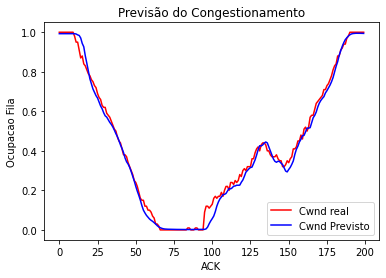

Observe a tendência1
[[72  0  0]
 [ 6 76  0]
 [ 0  4 42]]
Valores de teste Exibidos1
#############len(base_teste):  200
7/7 [==============================] - 2s 58ms/step


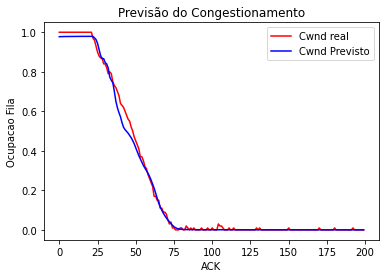

Observe a tendência1
[[142   0   0]
 [  1  21   0]
 [  0   1  35]]
Amostra Peso Clientes:
[0.12050834 0.35344315 0.01089834 0.12921815]
[-0.03817185  0.23483847 -0.06187754  0.24640894]
Amostra Peso Consolidado: 
[ 0.04116825  0.29414082 -0.0254896   0.18781355]
Cliente  0  Recebido Modelo do Servidor
Cliente  1  Recebido Modelo do Servidor
Feedbacks Enviados e descartados
Valores de teste Exibidos1
#############len(base_teste):  200
7/7 [==============================] - 2s 58ms/step
Modelo do Servidor avaliado
Pesos Mantidos de acordo com o modelo do cliente
[[72  0  0]
 [ 6 76  0]
 [ 0  4 42]]
Valores de teste Exibidos1
#############len(base_teste):  200
7/7 [==============================] - 3s 59ms/step
Modelo do Servidor avaliado
Pesos Mantidos de acordo com o modelo do cliente
[[142   0   0]
 [  1  21   0]
 [  0   1  35]]
Valores de teste Exibidos1
#############len(base_teste):  200
7/7 [==============================] - 3s 59ms/step


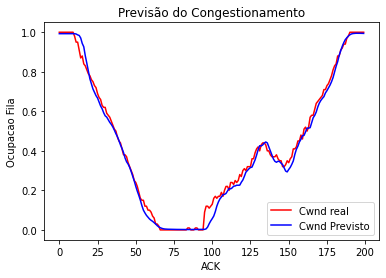

Observe a tendência1
[[72  0  0]
 [ 6 76  0]
 [ 0  4 42]]
Valores de teste Exibidos1
#############len(base_teste):  200
7/7 [==============================] - 2s 61ms/step


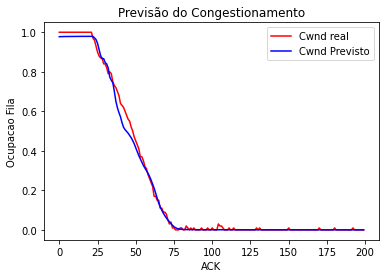

Observe a tendência1
[[142   0   0]
 [  1  21   0]
 [  0   1  35]]
##################Round  1  ##################################
Real Congestion: 
Epoch 1/20
 56/169 [========>.....................] - ETA: 32s - loss: 0.0030 - mean_absolute_error: 0.0260

KeyboardInterrupt: ignored

In [6]:
'''
Server::ConsolidateModels----------------Server::FeedBackConsolidatedModel--------------Client::RefreshModel
'''

#numClients = 3; #Can be gotten from user

#lstClients = [];

objServe = Server_FederatedAMA()

#for i in range (numClients):
  #objClient = Client(objServe,i)
  #lstClients.append(objClient)

#for x in lstClients:
  #print("Cliente ", x.id, "Criado com Sucesso");


#for x in lstClients:
 #objServe.RegisterClient(x)

#objServe.PrintRegistredClients()

'''
for i in range (0,10):
  print("==================Rodada ",i" ========================")
  for x in lstClients:
    x.TreinarModelo
  for x in lstClients:
    x.SendModelToServer
  objServe.ConsolidateModels
  objServe.FeedBackConsolidatedModel()
  for x in lstClients:
    x.AtualizarModelo();
'''

objClient1 = Client(0,'/content/drive/MyDrive/Colab Notebooks/Exp_000003/training_10_3_0_2to10_35_0_2_L_Mon Mar 20 08_03_16.csv',
                               '/content/drive/MyDrive/Colab Notebooks/Exp_000003/test_10_3_0_2to10_35_0_2_L_Mon Mar 20 08_03_16.csv', 90);








objClient2 = Client(1,'/content/drive/MyDrive/Colab Notebooks/Exp_000003/training_10_9_0_2to10_35_0_2_L_Mon Mar 20 08_03_16.csv',
                               '/content/drive/MyDrive/Colab Notebooks/Exp_000003/test_10_9_0_2to10_35_0_2_L_Mon Mar 20 08_03_16.csv', 90);

'''
objClient3 = Client(2,'/content/drive/MyDrive/Colab Notebooks/Exp_000002/training_client03_10_1_2_2to10_35_0_2_trainingFri Feb 24 10_09_37.csv',
                               '/content/drive/MyDrive/Colab Notebooks/Exp_000002/test_Fri Feb 24 09_39_49.csv', 90);

'''
#########################Registrando no Servidor Central#######################################

objServe.RegisterClient(objClient1) #Refresh é atualização por trinamento
objServe.RegisterClient(objClient2)
#objServe.RegisterClient(objClient3)

for i in range(2):
  print("##################Round ", i, " ##################################")
  objClient1.RefreshModel(parInitial=True)
  gc.collect()
  objClient2.RefreshModel(parInitial=True)
  gc.collect()

  #objClient3.RefreshModel(parInitial=True)
  #gc.collect()


  ###################Testando#################################

  
  objClient1.GetPrevision()
  print (objClient1.currentConfusionMatriz)

  objClient2.GetPrevision()
  print (objClient2.currentConfusionMatriz)
  '''
  objClient3.GetPrevision()
  print (objClient3.currentConfusionMatriz)
  '''
  #########################Consolidando os modelos#######################################

  objServe.ConsolidateModels()
  objServe.FeedBackConsolidatedModel()

  #########################Testando o novo modelo#######################################
  #########################Atualizando, conforme o caso#######################################

  objClient1.RefreshFromServerModel() # Atualização considerando o modelo do servidor e não por treinamento, conforme o método Refresh
  print (objClient1.currentConfusionMatriz)
  objClient2.RefreshFromServerModel()
  print (objClient2.currentConfusionMatriz)
  #objClient3.RefreshModel()
  #print (objClient3.currentConfusionMatriz)

  #########################Novas matrizes, após atualização ou não dos modelos#######################################

  objClient1.GetPrevision()
  print (objClient1.currentConfusionMatriz)
  objClient2.GetPrevision()
  print (objClient2.currentConfusionMatriz)
  #objClient3.GetPrevision()
  #print (objClient3.currentConfusionMatriz)




In [ ]:
###################Testando#################################

#objClient1.LoadTestData()
objClient1.GetPrevision()
print (objClient1.currentConfusionMatriz)

#objClient2.LoadTestData()
objClient2.GetPrevision()
print (objClient2.currentConfusionMatriz)

'''
#objClient3.LoadTestData()
objClient3.GetPrevision()
print (objClient3.currentConfusionMatriz)
'''


observe os valores de teste
(200, 1)
[[0.43]
 [0.43]
 [0.44]
 [0.42]
 [0.41]
 [0.41]
 [0.41]
 [0.4 ]
 [0.39]
 [0.39]
 [0.39]
 [0.39]
 [0.39]
 [0.41]
 [0.42]
 [0.43]
 [0.44]
 [0.45]
 [0.46]
 [0.46]
 [0.5 ]
 [0.5 ]
 [0.51]
 [0.52]
 [0.53]
 [0.56]
 [0.58]
 [0.58]
 [0.57]
 [0.57]
 [0.59]
 [0.59]
 [0.58]
 [0.62]
 [0.61]
 [0.62]
 [0.62]
 [0.64]
 [0.63]
 [0.64]
 [0.63]
 [0.65]
 [0.65]
 [0.66]
 [0.68]
 [0.68]
 [0.69]
 [0.7 ]
 [0.7 ]
 [0.72]
 [0.74]
 [0.75]
 [0.75]
 [0.74]
 [0.76]
 [0.78]
 [0.78]
 [0.79]
 [0.82]
 [0.83]
 [0.84]
 [0.86]
 [0.86]
 [0.87]
 [0.85]
 [0.86]
 [0.87]
 [0.89]
 [0.9 ]
 [0.9 ]
 [0.92]
 [0.91]
 [0.91]
 [0.91]
 [0.9 ]
 [0.93]
 [0.93]
 [0.93]
 [0.93]
 [0.94]
 [0.95]
 [0.95]
 [0.96]
 [0.97]
 [0.96]
 [0.96]
 [0.97]
 [0.98]
 [0.98]
 [0.99]
 [0.99]
 [0.01]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.01]
 [0.  ]
 [0.  ]
 [0.01]
 [0.01]
 [0.  ]
 [0.  ]
 [0.01]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.01]
 [0

KeyboardInterrupt: ignored

In [ ]:
#########################Registrando no Servidor Central#######################################

objServe.RegisterClient(objClient1)
objServe.RegisterClient(objClient2)
#objServe.RegisterClient(objClient3)

#########################Consolidando os modelos#######################################

objServe.ConsolidateModels()
objServe.FeedBackConsolidatedModel()

#########################Testando o novo modelo#######################################
#########################Atualizando, conforme o caso#######################################

objClient1.RefreshModel()
print (objClient1.currentConfusionMatriz)
objClient2.RefreshModel()
print (objClient2.currentConfusionMatriz)
#objClient3.RefreshModel()
#print (objClient3.currentConfusionMatriz)

#########################Novas matrizes, após atualização ou não dos modelos#######################################

objClient1.GetPrevision()
print (objClient1.currentConfusionMatriz)
objClient2.GetPrevision()
print (objClient2.currentConfusionMatriz)
#objClient3.GetPrevision()
#print (objClient3.currentConfusionMatriz)



Amostra Peso Clientes:
[ 0.0412781   0.02001925 -0.02802959 -0.1337096 ]
[-0.03155766 -0.0922809   0.1419743   0.02744952]
Amostra Peso Consolidado: 
[ 0.00486022 -0.03613082  0.05697235 -0.05313004]
Cliente  0  Recebido Modelo do Servidor
Cliente  1  Recebido Modelo do Servidor
Feedbacks Enviados e descartados
#############len(base_teste):  200
7/7 [==============================] - 2s 53ms/step
Modelo do Servidor avaliado
Pesos atualizados de acordo com o modelo do servidor
[[  0   4   0]
 [  0  94   0]
 [  0 102   0]]
#############len(base_teste):  200
7/7 [==============================] - 2s 43ms/step
Modelo do Servidor avaliado
Pesos Mantidos de acordo com o modelo do cliente
[[  0   2   0]
 [  0  32   0]
 [  2  42 122]]
#############len(base_teste):  200
7/7 [==============================] - 1s 50ms/step
[[  0   4   0]
 [  0  94   0]
 [  0 102   0]]
#############len(base_teste):  200
7/7 [==============================] - 1s 43ms/step
[[  0   2   0]
 [  0  32   0]
 [  2  42 122

In [ ]:
listaBase = [["amarelo","verde","preto"], ["azul","abóbora","marrom"], ["uva","laranja","branco"]]
arrays_in_Layer=[]
lstTemp = []
lst_arrays_in_Layer = []
for layer in listaBase:
  for arr in layer:
    lstTemp.append(arr)
  arrays_in_Layer = [i for i in lstTemp]
  lst_arrays_in_Layer.append(arrays_in_Layer)
  lstTemp.clear()
print (lst_arrays_in_Layer)

[['amarelo', 'verde', 'preto'], ['azul', 'abóbora', 'marrom'], ['uva', 'laranja', 'branco']]


In [ ]:
base_iris = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iris.csv")
previsores_iris = base_iris.iloc[:,0:4].values 
classes_iris = base_iris.iloc[:,4].values
labelencoder = LabelEncoder()
classes_iris = labelencoder.fit_transform(classes_iris)
classes_dummy_iris = np_utils.to_categorical(classes_iris)
# iris setosa     1 0 0
# iris virginica  0 1 0
# iris versicolor 0 0 1
previsores_treinamento_iris, previsores_teste_iris, classe_treinamento_iris,classe_teste_iris = train_test_split(previsores_iris,classes_dummy_iris, test_size=0.25)
classificador = Sequential()
classificador.add(Dense(units = 4, activation = 'relu', input_dim = 4))
classificador.add(Dense(units = 4, activation = 'relu'))
classificador.add(Dense(units = 3, activation = 'softmax'))
classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                      metrics = ['categorical_accuracy'])
classificador.fit(previsores_treinamento_iris, classe_treinamento_iris, batch_size = 10,
                  epochs = 1000)

resultado_iris = classificador.evaluate(previsores_teste_iris, classe_teste_iris)
previsoes_iris = classificador.predict(previsores_teste_iris)
previsoes_iris = previsoes_iris > 0.5
#classe_teste2 e previsoes2 são listas
classe_teste2 = [np.argmax(t) for t in classe_teste_iris]
previsoes2 = [np.argmax(t) for t in previsoes_iris]
matriz_iris = confusion_matrix(previsoes2, classe_teste2)
print(matriz_iris)



[[14  0  0]
 [ 0  9  1]
 [ 0  2 12]]
